In [1]:
import requests
import sys
from urllib.parse import urlencode
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common.exceptions import TimeoutException
options = webdriver.ChromeOptions()
options.add_argument('headless')
options.add_argument('window-size=1200x600')
options.add_experimental_option("excludeSwitches", ["enable-automation"])
options.add_experimental_option('useAutomationExtension', False)
from webdriver_manager.chrome import ChromeDriverManager
from selenium import webdriver
driver = webdriver.Chrome(executable_path=ChromeDriverManager().install(),options=options)


from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # <--- This is important for 3d plotting 
import scipy
import time

%matplotlib inline


Looking for [chromedriver 81.0.4044.138 mac64] driver in cache 
File found in cache by path [/Users/dennisren/.wdm/drivers/chromedriver/81.0.4044.138/mac64/chromedriver]


In [2]:
url="https://www.levels.fyi/comp.html?track=Hardware%20Engineer&search=ICT3"
driver.get(url)


In [3]:
salaryData=None
while salaryData is None:
    salaryData=driver.execute_script("return salaryData;")
    time.sleep(1)

In [4]:
import pandas as pd

In [25]:
myComp={}
myComp["yoe"]=2
myComp["totalyearlycompensation"]=float(input("TC "))
myComp["basesalary"]=float(input("Base "))
myComp["bonus"]=float(input("Bonus "))
myComp["stockgrantvalue"]=float(input("RSU "))

TC162.5
Base130
Bonus1
RSU32


In [6]:
sdf=pd.DataFrame(salaryData)
sdf["basesalary"] = pd.to_numeric(sdf["basesalary"])
sdf["bonus"] = pd.to_numeric(sdf["bonus"])
sdf["stockgrantvalue"] = pd.to_numeric(sdf["stockgrantvalue"])
sdf["totalyearlycompensation"] = pd.to_numeric(sdf["totalyearlycompensation"])
sdf["yearsatcompany"] = pd.to_numeric(sdf["yearsatcompany"])
sdf["yearsofexperience"] = pd.to_numeric(sdf["yearsofexperience"])

sdf = sdf[(sdf['stockgrantvalue'] < 500)]
sdf = sdf[(sdf['totalyearlycompensation'] < 500)]
sdf = sdf[(sdf['basesalary'] < 500)]
sdf = sdf[(sdf['bonus'] < 500)]



In [7]:
sdf

,basesalary,bonus,cityid,company,dmaid,gender,level,location,otherdetails,rowNumber,stockgrantvalue,tag,timestamp,title,totalyearlycompensation,yearsatcompany,yearsofexperience
0,107.0,10.0,7392,Oracle,807,,L3,"Redwood City, CA",,1,20.0,,6/7/2017 11:33:27,Product Manager,127.0,1.5,1.5
6,157.0,35.0,7472,Apple,807,,M1,"Sunnyvale, CA",,7,180.0,,6/17/2017 0:23:14,Software Engineering Manager,372.0,5.0,7.0
11,180.0,55.0,11521,Microsoft,819,,65,"Redmond, WA",,12,65.0,,6/22/2017 12:37:51,Software Engineering Manager,300.0,11.0,15.0
12,135.0,13.0,11527,Microsoft,819,,62,"Seattle, WA",,13,8.0,,6/22/2017 13:55:26,Software Engineer,156.0,4.0,4.0
15,157.0,28.0,11527,Microsoft,819,,63,"Seattle, WA",,16,26.0,,6/26/2017 21:25:45,Software Engineer,201.0,6.0,12.0
17,230.0,45.0,7419,Salesforce,807,,9,"San Francisco, CA",,18,100.0,,6/30/2017 16:29:50,Software Engineering Manager,450.0,3.0,16.0
20,152.0,22.0,11527,Microsoft,819,,63,"Seattle, WA",,21,17.0,,7/7/2017 22:29:34,Software Engineer,191.0,7.0,7.0
23,150.0,61.0,11527,Amazon,819,,L5,"Seattle, WA",,25,7.0,,7/16/2017 16:50:46,Software Engineer,218.0,0.0,10.0
24,155.0,15.0,7419,Facebook,807,,34,"San Francisco, CA",30k signing bonus,26,200.0,,7/17/2017 21:50:52,Software Engineer,220.0,0.0,2.0
31,125.0,15.0,7472,Oath,807,,IC4,"Sunnyvale, CA",,33,30.0,,7/25/2017 14:44:53,Software Engineer,155.0,7.0,8.0


In [8]:
appleSDF=sdf[sdf["company"]=="Apple"]

In [9]:
appleICT3SDF=appleSDF[(sdf["level"]=="ICT3")]
appleICT23SDF=appleSDF[(sdf["level"]=="ICT3")|(sdf["level"]=="ICT2")]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [10]:
AppleICT3HWSDF=appleICT3SDF[appleICT3SDF['title'].str.contains("Hardware") & (appleICT3SDF["yearsofexperience"] <=3)]

In [11]:
Industry3YOESDF=sdf[sdf['title'].str.contains("Hardware") & (sdf["yearsofexperience"] <=3)]

In [12]:
FAANG3YOESDF=Industry3YOESDF[Industry3YOESDF["company"].isin(["Facebook","Amazon","Apple","Google","Waymo","X","Oculus"])]
appleICT233YOESDF=appleICT23SDF[(appleICT23SDF["yearsofexperience"] <=3)]

In [13]:
FAANG3YOESDF

,basesalary,bonus,cityid,company,dmaid,gender,level,location,otherdetails,rowNumber,stockgrantvalue,tag,timestamp,title,totalyearlycompensation,yearsatcompany,yearsofexperience
2246,100.0,5.0,7419,Apple,807,,L2,"San Francisco, CA",,2487,10.0,Product,9/29/2018 3:01:21,Hardware Engineer,115.0,1.0,1.0
3679,115.0,10.0,7158,Apple,807,Male,ICT2,"Cupertino, CA",,4084,50.0,Camera,11/25/2018 19:54:02,Hardware Engineer,175.0,0.0,2.0
3922,93.0,14.0,8198,Google,602,Male,L2,"Chicago, IL",,4361,18.0,Consumer,12/11/2018 9:37:45,Hardware Engineer,125.0,0.0,0.0
4632,120.0,15.0,7158,Apple,807,Female,ICT2,"Cupertino, CA",,5184,16.0,cpu,1/18/2019 17:36:31,Hardware engineer,151.0,0.0,0.0
6396,135.0,24.0,7434,Apple,807,,ICT3,"Santa Clara, CA",,7201,26.0,Hardware,3/29/2019 11:47:58,Hardware engineer,185.0,0.0,3.0
8381,120.0,35.0,11527,Amazon,819,Female,L5,"Seattle, WA",,9516,25.0,Prime Air,6/6/2019 23:33:26,Hardware Engineer,180.0,0.5,2.0
8431,155.0,20.0,7158,Apple,807,Male,ICT4,"Cupertino, CA",,9580,80.0,iPhone,6/8/2019 15:13:26,Hardware Engineer,255.0,3.0,3.0
9285,140.0,40.0,7158,Apple,807,,ICT3,"Cupertino, CA",,10661,26.0,Hardware,6/18/2019 16:47:46,Hardware Engineer,201.0,0.0,0.0
9412,157.0,63.0,7322,Google,807,,L4,"Mountain View, CA",,10821,40.0,ML / AI,6/20/2019 15:38:30,Hardware Engineer,260.0,0.0,2.0
9469,135.0,26.0,7158,Apple,807,Male,ICT3,"Cupertino, CA",PhD,10896,26.0,"Battery (SEG, HW Technology Org)",6/21/2019 18:49:00,Hardware Engineer,187.0,1.0,1.0


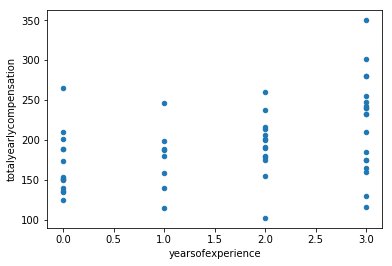

In [14]:
FAANG3YOESDF.plot.scatter("yearsofexperience","totalyearlycompensation")

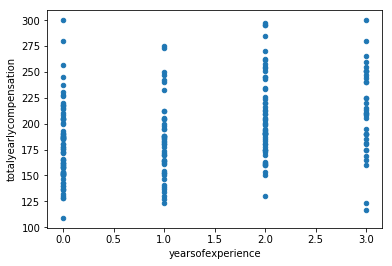

In [15]:
appleICT233YOESDF.plot.scatter("yearsofexperience","totalyearlycompensation")



0.0 180.58235294117648
1.0 182.92
2.0 211.828125
3.0 233.77777777777777
4.0 248.80769230769232
5.0 263.9583333333333
6.0 259.95348837209303
7.0 262.6829268292683
8.0 287.2741935483871
9.0 273.48387096774195


<IPython.core.display.Javascript object>


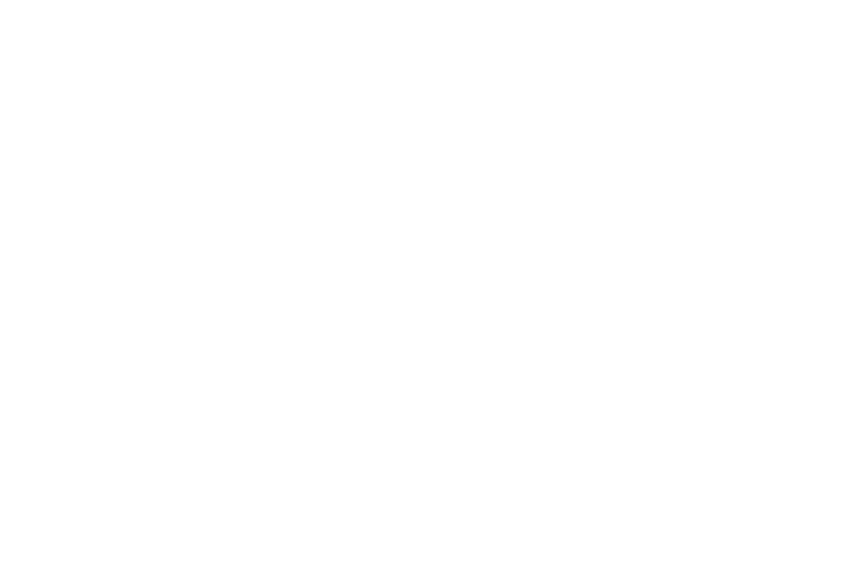

<IPython.core.display.Javascript object>


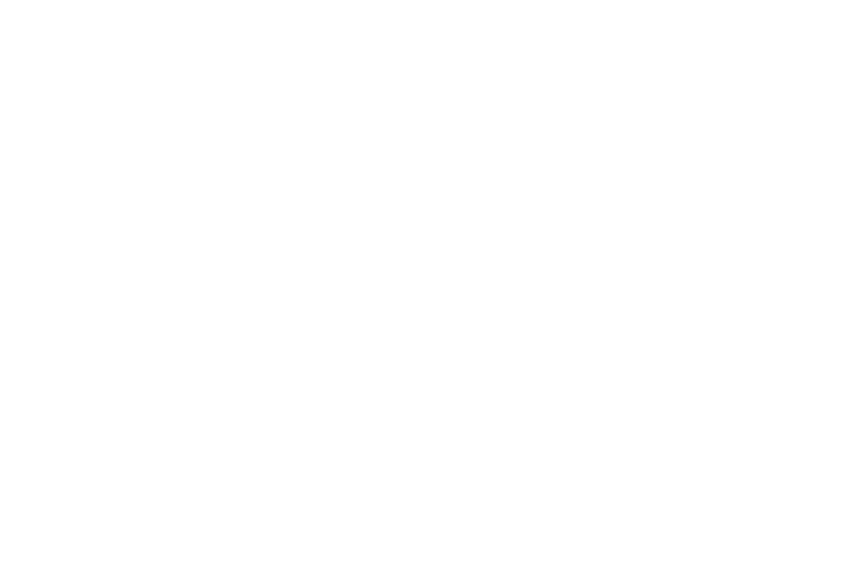

In [16]:
%matplotlib notebook

def normalize(v):
    ma=max(v)
    return v / ma

def pdfYOESurface(df,column="totalyearlycompensation",comp=None):

    yoes=list(set(df["yearsofexperience"]))
    ys = np.linspace(min(df["totalyearlycompensation"]), max(df["totalyearlycompensation"]), 100)

    xs=yoes
    zs=np.zeros(shape=(100,len(yoes)))
    for index,yoe in enumerate(yoes):
        yoedf=df[df["yearsofexperience"]==yoe]
        mu, std = norm.fit(yoedf["totalyearlycompensation"])
        print(yoe,mu)
        p = normalize(np.array(norm.pdf(ys, mu, std)))
    #         xs.extend([yoe]*len(x))
    #         ys.extend(x)
        zs[:,index]=p
        if comp is not None and comp["yoe"]==yoe:
            f=scipy.interpolate.interp1d(ys,p)
            intersec=f(comp[column])
            

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    xs, ys = np.meshgrid(xs, ys)
    ax.plot_surface(xs,ys,zs,zorder=2)
    if comp is not None:
        xs=[comp["yoe"]]*2
        ys=[comp[column]]*2
        xs, ys = np.meshgrid(xs, ys)
        zs=[intersec,1]
        ax.plot(xs,ys,zs,linewidth=3,zorder=3,color="r")
pdfYOESurface(appleSDF[appleSDF["yearsofexperience"]<10],comp=myComp)
#     mu, std = norm.fit(df[column])
#     x = np.linspace(min(column), max(column), 100)
#     p = norm.pdf(x, mu, std)
    

130 is 11.460246653098737% Percentile
11.5 Percentile
Apple ICT3 with <3 YOE, HWE, base
1 is 2.767290217279769% Percentile
2.8 Percentile
Apple ICT3 with <3 YOE, HWE, bonus
32.5 is 41.29303873338563% Percentile
41.3 Percentile
Apple ICT3 with <3 YOE, HWE, RSU/yr
162.5 is 12.960284007693796% Percentile
13.0 Percentile
Apple ICT3 with <3 YOE, HWE, TC


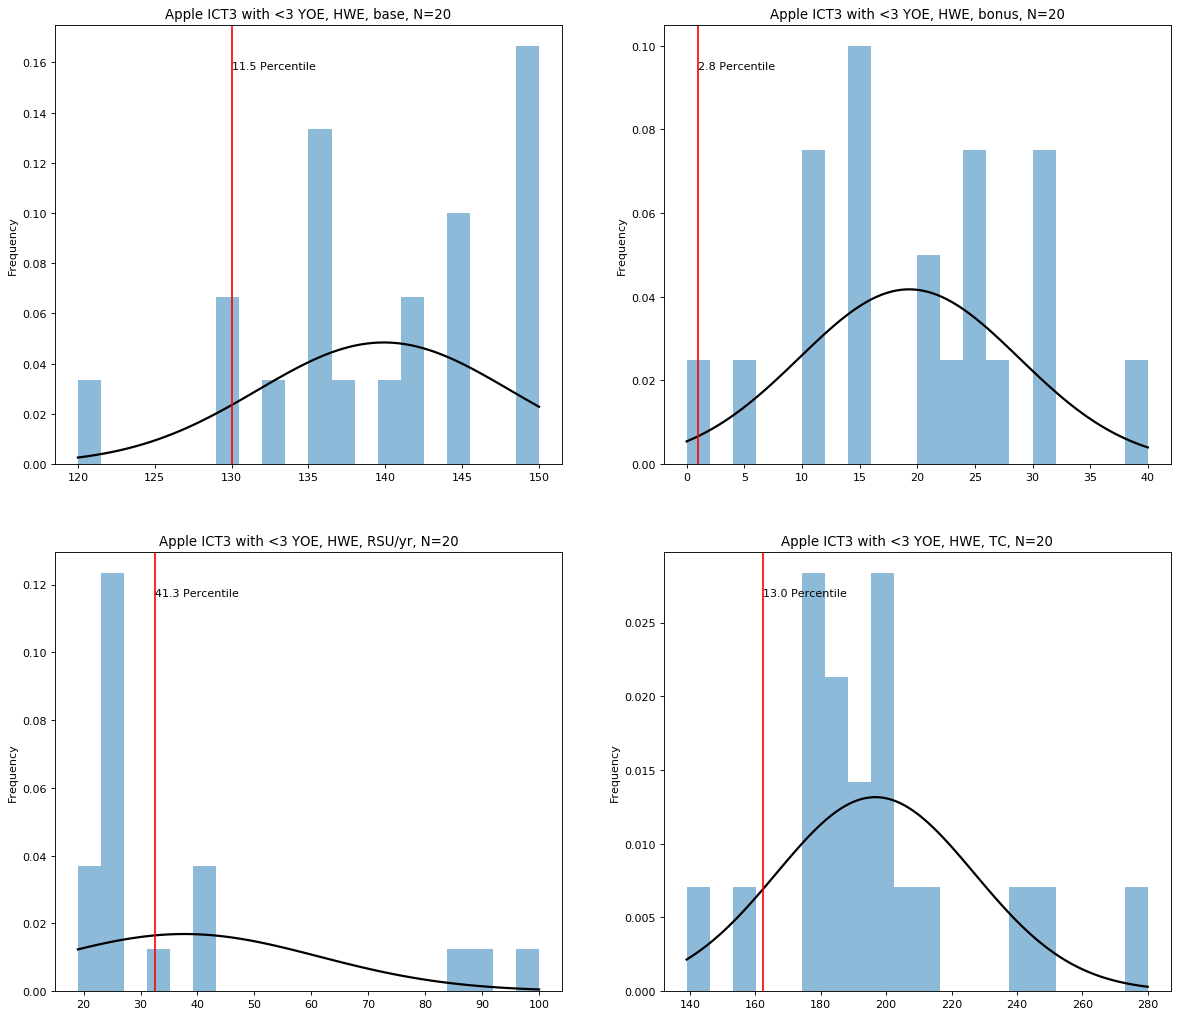

In [17]:
%matplotlib inline

def plotDist(column,myval=None,title=None,ax=None):
    ax=column.plot.hist(bins=20, alpha=0.5,density=True,ax=ax)
    mu, std = norm.fit(column)
    x = np.linspace(min(column), max(column), 100)
    p = norm.pdf(x, mu, std)
    ax.plot(x, p, 'k', linewidth=2)
    if myval is not None:
        ax.axvline(myval,color="r")
        cdf = norm.cdf(myval, mu, std)
        print(str(myval)+" is "+str(cdf*100)+"% Percentile")
        ylim=ax.get_ylim()[1]
        percText='%.1f Percentile'%(cdf*100)
        print(percText)
        ax.text(myval,ylim*0.9,percText)
    if title is not None:
        ax.set_title(title+", N="+str(len(column)))
        print(title)
    return ax

def analyzeComp(sdf,myComp,sdfNote):
    fig, axs = plt.subplots(2,2,figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
    plotDist(sdf["basesalary"],myval=myComp["basesalary"],title=sdfNote+", base",ax=axs[0,0])
    plotDist(sdf["bonus"],myval=myComp["bonus"],title=sdfNote+", bonus",ax=axs[0,1])
    plotDist(sdf["stockgrantvalue"],myval=myComp["stockgrantvalue"],title=sdfNote+", RSU/yr",ax=axs[1,0])
    plotDist(sdf["totalyearlycompensation"],myval=myComp["totalyearlycompensation"],title=sdfNote+", TC",ax=axs[1,1])

analyzeComp(AppleICT3HWSDF,myComp,"Apple ICT3 with <3 YOE, HWE")

130 is 57.16508932803392% Percentile
57.2 Percentile
Apple 2YOE, HWE, base
1 is 9.00562299397713% Percentile
9.0 Percentile
Apple 2YOE, HWE, bonus
32.5 is 96.63192947854853% Percentile
96.6 Percentile
Apple 2YOE, HWE, RSU/yr
162.5 is 48.35495813799633% Percentile
48.4 Percentile
Apple 2YOE, HWE, TC


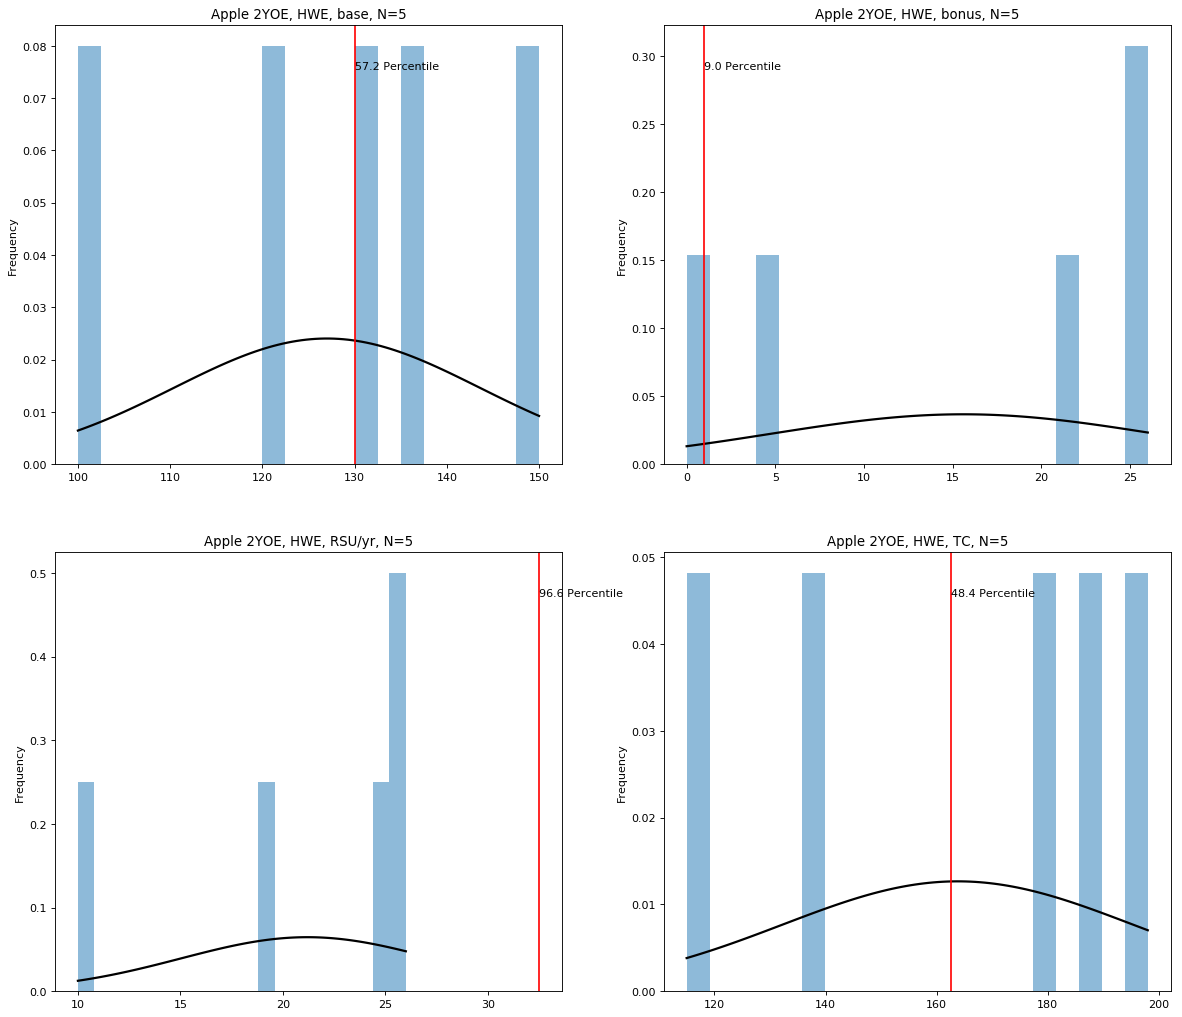

In [22]:
AppleNGHWSDF=appleSDF[appleSDF['title'].str.contains("Hardware") & (appleSDF["yearsofexperience"] ==1)]
analyzeComp(AppleNGHWSDF,myComp,"Apple 2YOE, HWE")

130 is 22.586797532937975% Percentile
22.6 Percentile
Google/FB/Oculus 1-3YOE, HWE, base
1 is 2.058761271692824% Percentile
2.1 Percentile
Google/FB/Oculus 1-3YOE, HWE, bonus
32.5 is 27.92666719690321% Percentile
27.9 Percentile
Google/FB/Oculus 1-3YOE, HWE, RSU/yr
162.5 is 7.65348735913883% Percentile
7.7 Percentile
Google/FB/Oculus 1-3YOE, HWE, TC


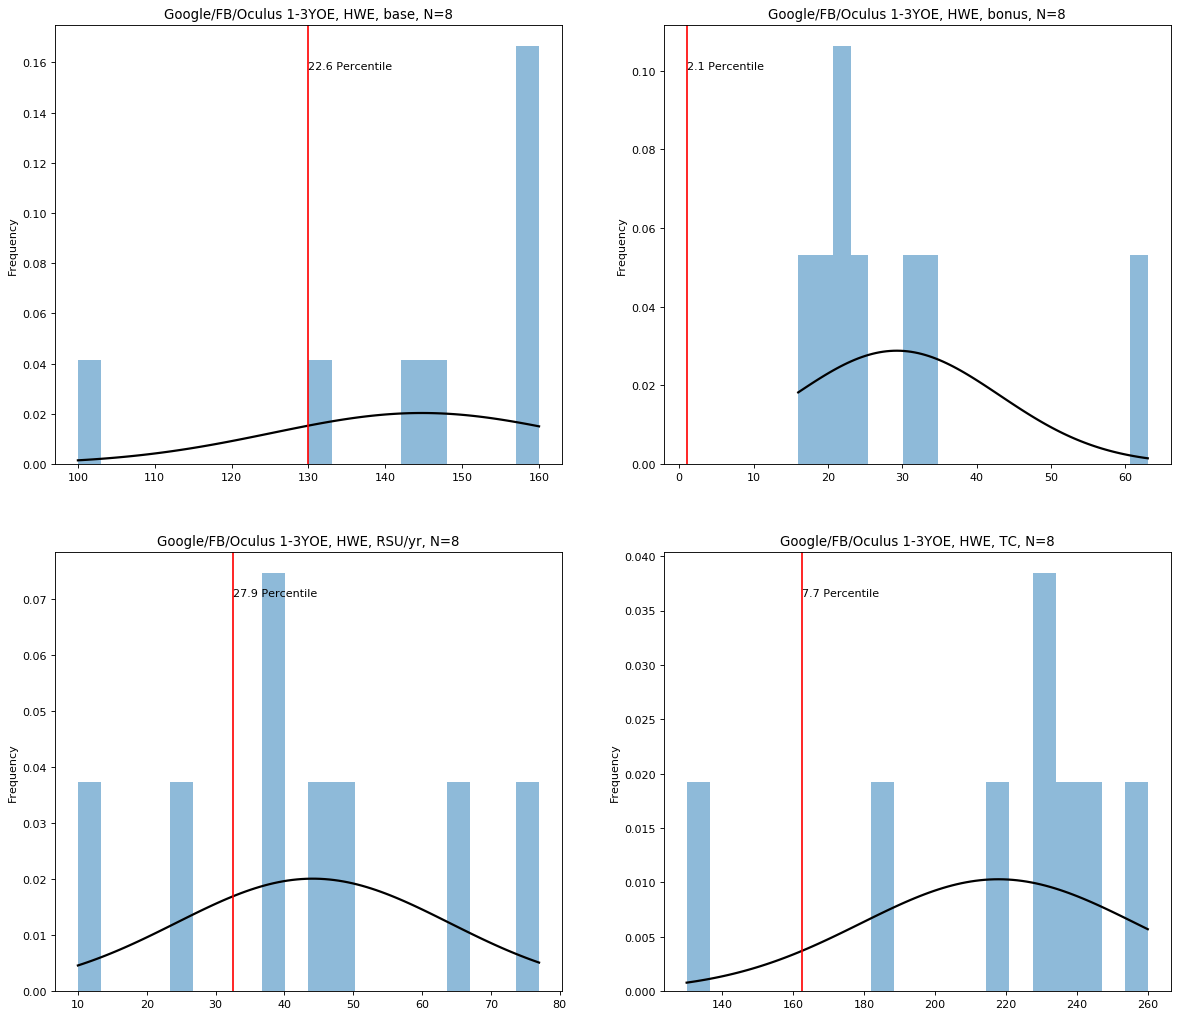

In [19]:


FB2YOESDF=sdf[sdf['title'].str.contains("Hardware") & (sdf["yearsofexperience"] <=3) & (sdf["yearsofexperience"] >0) & (sdf["company"].isin(["Google","Facebook","Oculus"]))]
analyzeComp(FB2YOESDF,myComp,"Google/FB/Oculus 1-3YOE, HWE")

130 is 16.037322213754102% Percentile
16.0 Percentile
Apple ICT3, 2YOE, base
1 is 6.189596421245975% Percentile
6.2 Percentile
Apple ICT3, 2YOE, bonus
32.5 is 24.170291109049085% Percentile
24.2 Percentile
Apple ICT3, 2YOE, RSU/yr
162.5 is 6.522148795454373% Percentile
6.5 Percentile
Apple ICT3, 2YOE, TC


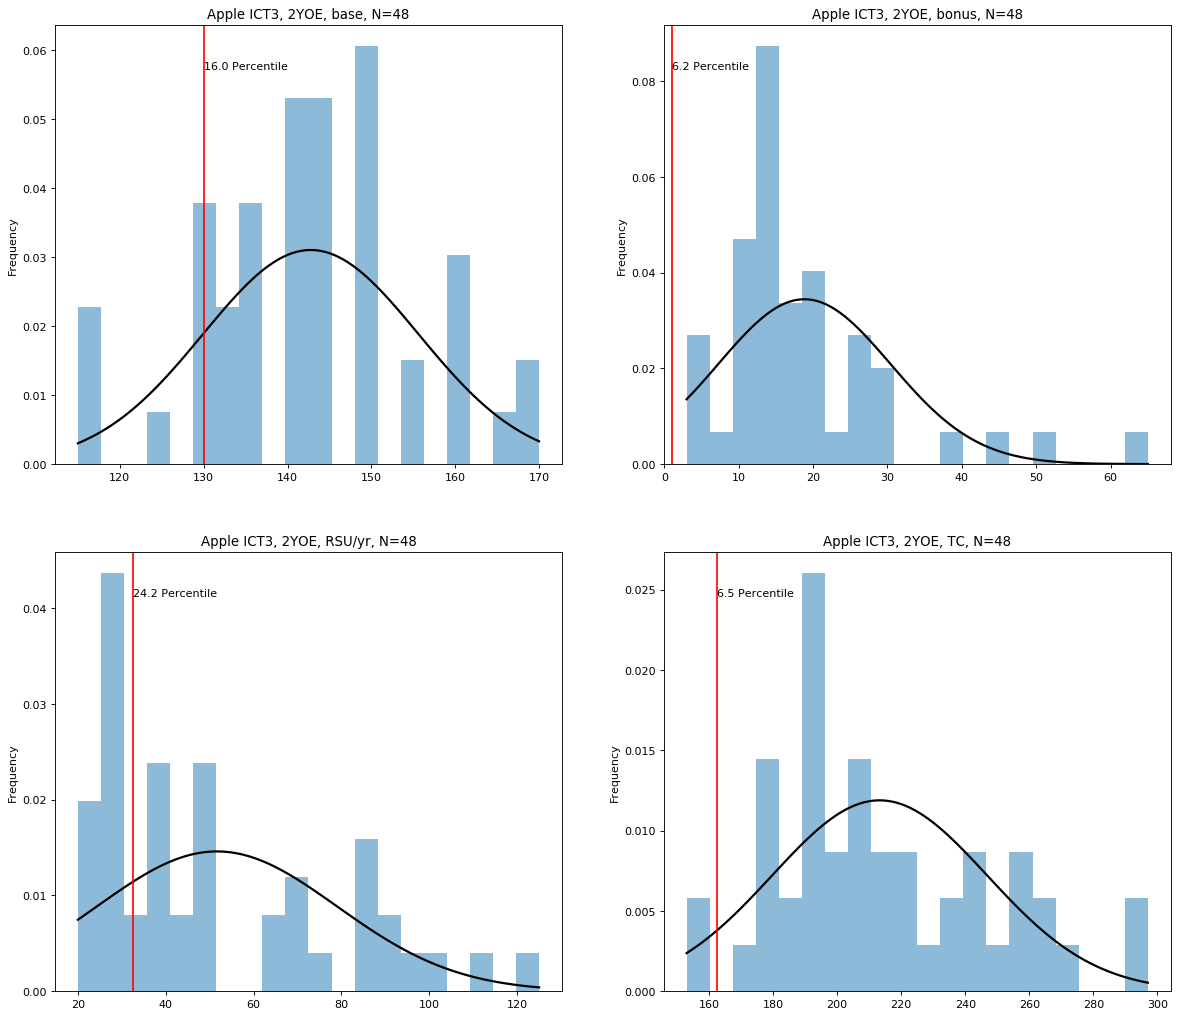

In [20]:

appleICT3SDF=appleSDF[(appleSDF["level"]=="ICT3") & (appleSDF["yearsofexperience"] ==2)]
analyzeComp(appleICT3SDF,myComp,"Apple ICT3, 2YOE")

130 is 16.037322213754102% Percentile
16.0 Percentile
Snap 2YOE, base
1 is 6.189596421245975% Percentile
6.2 Percentile
Snap 2YOE, bonus
32.5 is 24.170291109049085% Percentile
24.2 Percentile
Snap 2YOE, RSU/yr
162.5 is 6.522148795454373% Percentile
6.5 Percentile
Snap 2YOE, TC


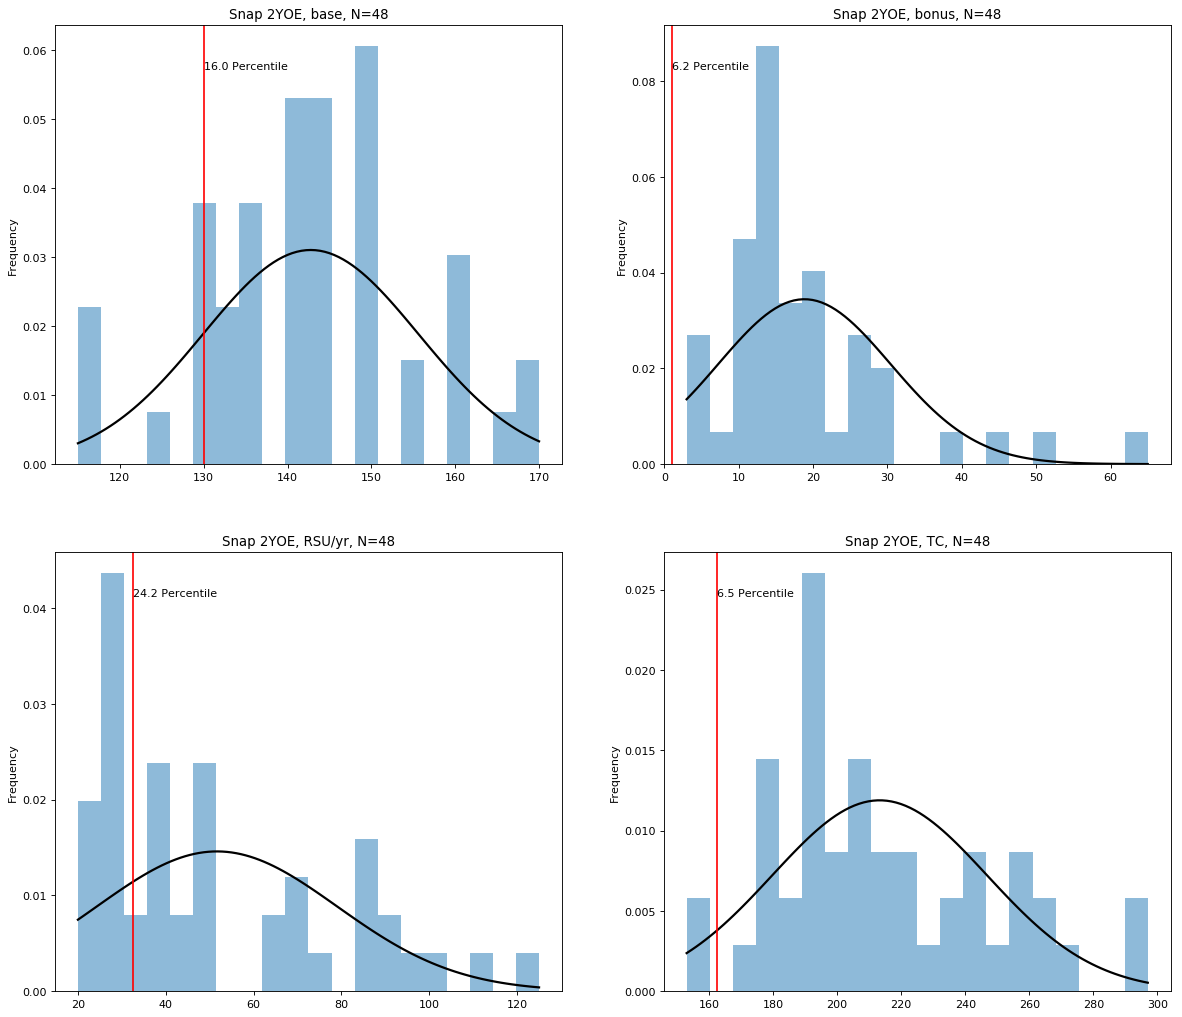

In [21]:
snap2YOE=sdf[ (sdf["yearsofexperience"] ==2) & (sdf["company"].isin(["Snap"]))]
analyzeComp(appleICT3SDF,myComp,"Snap 2YOE")